In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('advertising.csv', encoding='utf-8')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

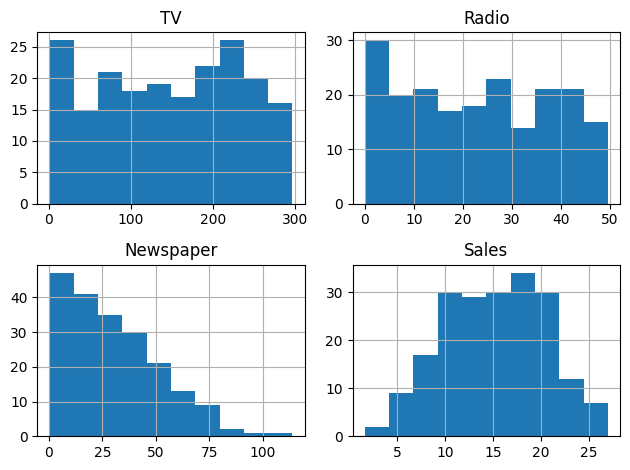

In [22]:
df.hist()
plt.tight_layout()

In [24]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', GradientBoostingRegressor(random_state=42))
])

In [27]:
param_grid = {
    'model__n_estimators': [30, 50, 70],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 4]
}

In [28]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2'  # R² score as the evaluation metric
)

In [29]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)

In [31]:
print('Best params:', grid_search.best_params_)
print('Best R2 (CV):', grid_search.best_score_)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Best params: {'model__max_depth': 3, 'model__min_samples_split': 4, 'model__n_estimators': 70}
Best R2 (CV): 0.944738012085075
MSE: 0.9808364212030529
MAE: 0.6727598767314303
RMSE: 0.9903718600621955
